# Stock Market Analysis -

About dataset -
Every candlestick of stock contains these features - 
1. high  
2. low
3. open
4. close

Apart from these features, "Date" and "Adjusted Close" is also used in data analysis

### Importing Libraries

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader import DataReader
sns.set_style('whitegrid')
%matplotlib inline


## Individual Stock Analysis

##### Analysis can be done on a single stock also, by changing the name of dataframe to the desired one.

Collecting data using pandas_datareader to call data from yahoo finance, of top 5 companies in NIFTY 50 by their market capitalization.

For the time being, data of only 1 year of stock prices is collected.

Here we are getting all the stock data like (High, Low, Open, Close, Volume, and Adj Close) of the mentioned stocks on their active trading days withing the past year




In [2]:
stocks_list = ['RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'INFY.NS', 'HINDUNILVR.NS']
pd_list = ['RIL', 'HDFCBANK', 'TCS', 'INFY', 'HINDUNILVR']

end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

for i in range(len(stocks_list)):
    globals()[pd_list[i]] = DataReader(stocks_list[i], 'yahoo', start, end)


In [3]:
# Sample of the indivisual dataframe of the RELIANCE stock price.
RIL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-16,2114.750000,2087.600098,2087.750000,2112.399902,4074206,2112.399902
2021-07-19,2124.000000,2092.250000,2100.000000,2098.949951,3855577,2098.949951
2021-07-20,2108.000000,2084.000000,2099.500000,2093.800049,3111185,2093.800049
2021-07-22,2123.899902,2098.149902,2119.000000,2120.699951,3679260,2120.699951
2021-07-23,2134.449951,2102.050049,2134.449951,2105.699951,4585938,2105.699951


An overiew of the data, where you can see the minimum,maximum value and the mean and standard deviation of each feature

In [4]:
RIL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,2483.214249,2426.352624,2454.393370,2454.088357,6.893305e+06,2454.088357
std,178.141872,170.655324,174.596014,173.754131,3.750674e+06,173.754131
min,2058.000000,2016.250000,2054.000000,2035.300049,7.871600e+05,2035.300049
25%,2401.250000,2347.199951,2373.000000,2373.199951,4.734472e+06,2373.199951
50%,2478.000000,2416.100098,2446.000000,2443.500000,6.092033e+06,2443.500000
75%,2606.000000,2551.050049,2580.000000,2578.649902,7.973935e+06,2578.649902
max,2856.149902,2786.100098,2856.149902,2819.850098,3.784167e+07,2819.850098


In [5]:
RIL.info() # since all the days of active trading days within the past year is being collected, there are no missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-07-16 to 2022-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       249 non-null    float64
 1   Low        249 non-null    float64
 2   Open       249 non-null    float64
 3   Close      249 non-null    float64
 4   Volume     249 non-null    int64  
 5   Adj Close  249 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


Adjusted Close - It is the closing price after adjustments for all applicable splits and dividend distributions.

It helps trader to see more accurate close price.

<AxesSubplot:xlabel='Date'>

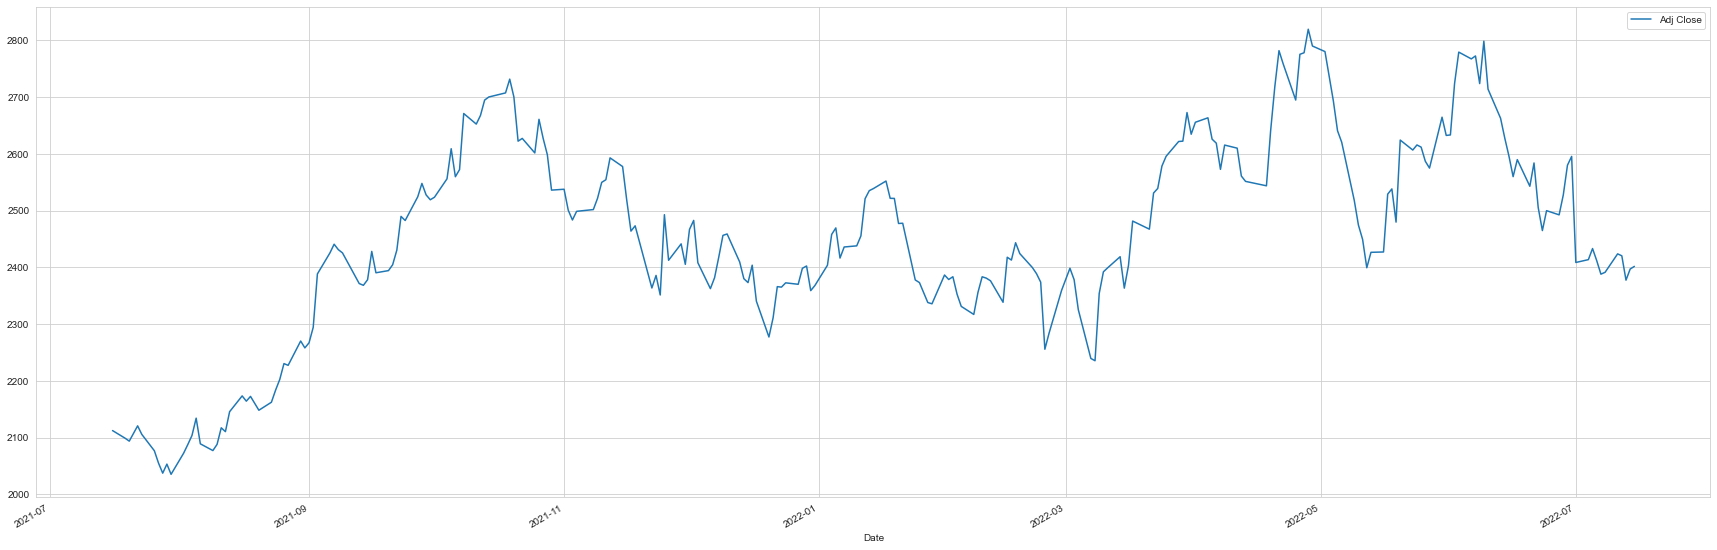

In [6]:
RIL['Adj Close'].plot(legend=True,figsize=(30,10))

Volume in the stock market means the total number of shares traded in a specified time frame

<AxesSubplot:xlabel='Date'>

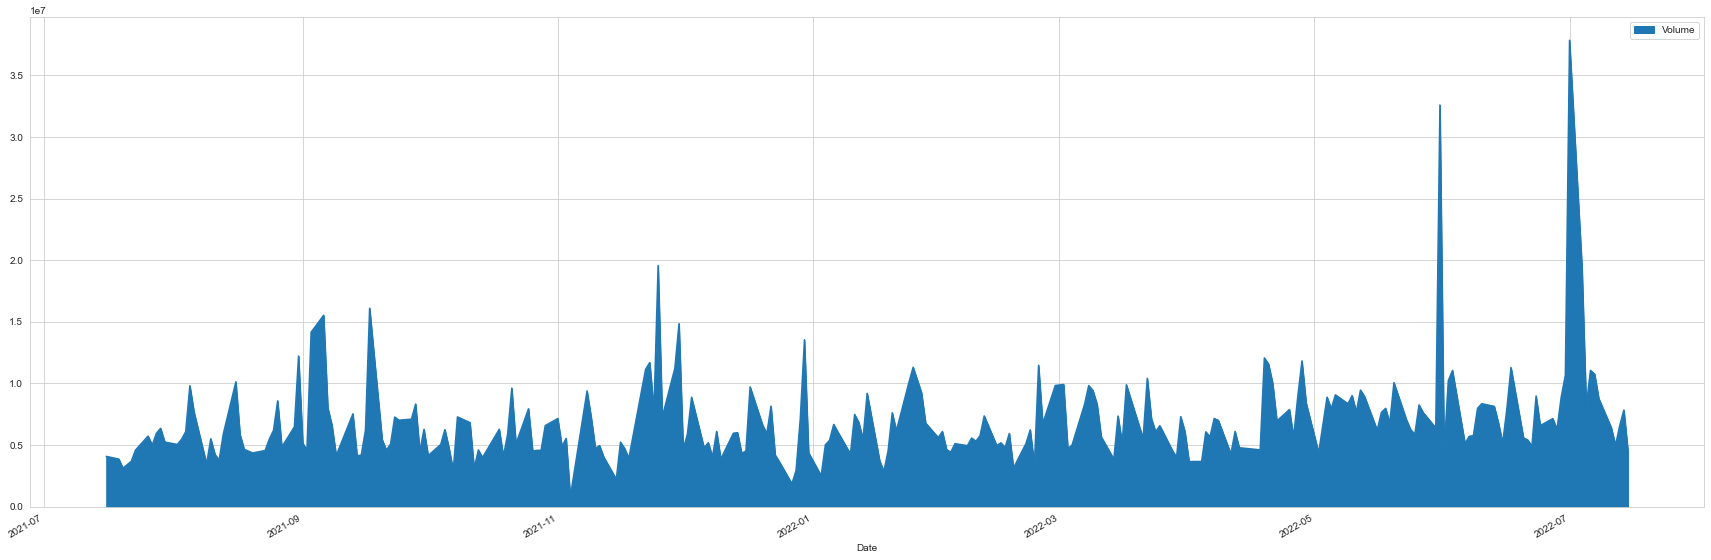

In [7]:
RIL['Volume'].plot(legend=True,figsize=(30,10),kind='area')

The moving average (MA) is used to identify the direction of a current price trend, without the interference of shorter-term price spikes.

The MA indicator combines price points of a stock over a specified time frame and divides it by the number of data points to present a single trend line.

In our case we are taking 10, 20 and 50 days of moving average and plotting it into the chart

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    RIL[column_name] = RIL['Adj Close'].rolling(window=ma,center=False).mean()

<AxesSubplot:xlabel='Date'>

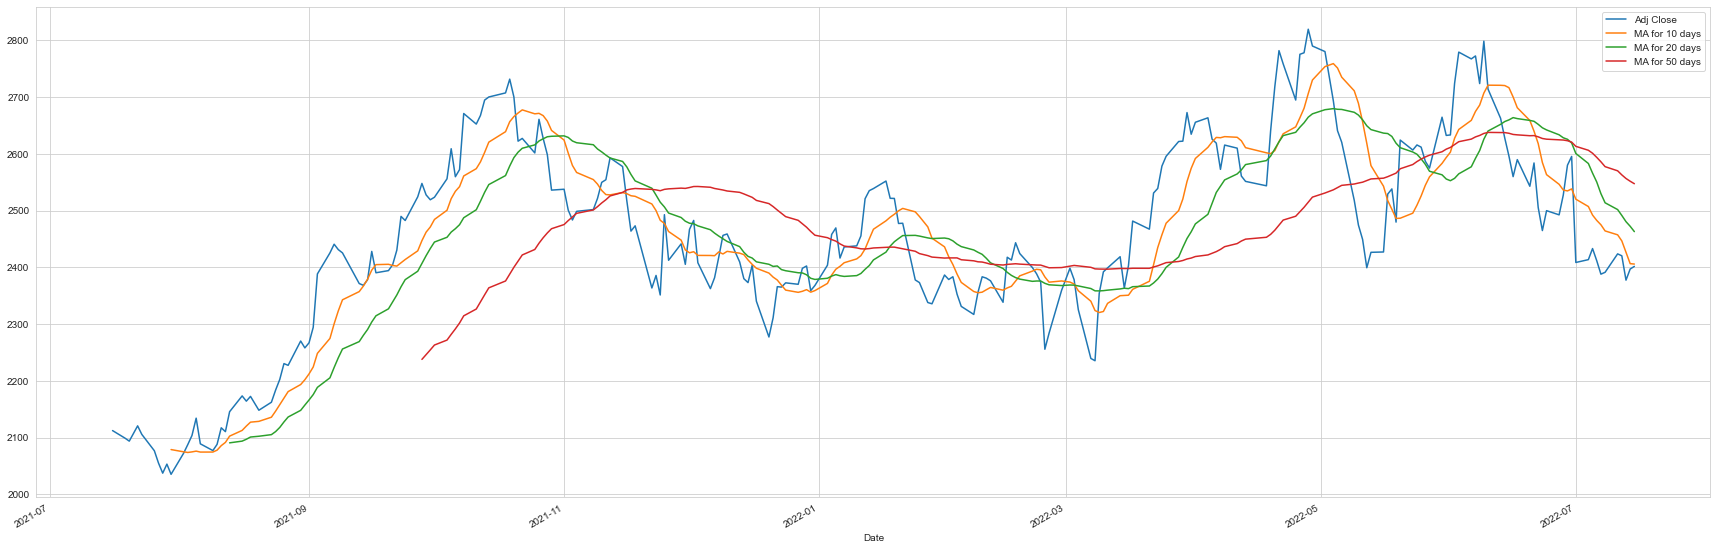

In [9]:
RIL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(30, 10))


Daily returns - It is defined as the percentage of change in price of the stock with respect to previous day price. 

In [10]:
RIL['Daily Return'] = RIL['Adj Close'].pct_change()


<AxesSubplot:xlabel='Date'>

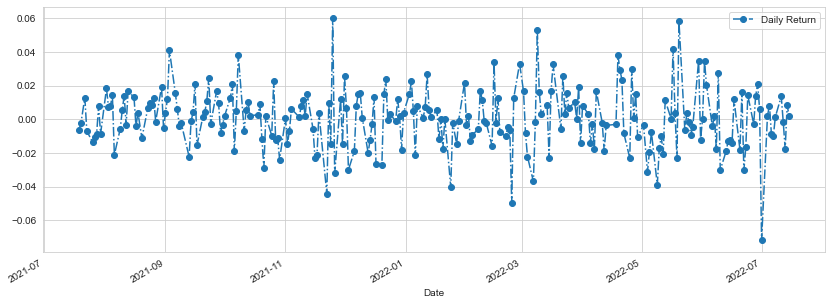

In [11]:
RIL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='-.',marker='o')


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

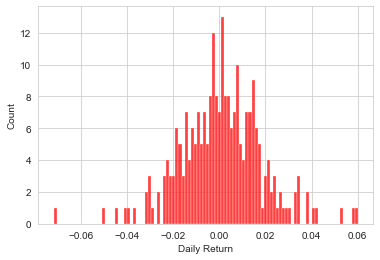

In [12]:
sns.histplot(x=RIL['Daily Return'].dropna(),bins=100,color='red')

In [14]:
adj_close = DataReader(stocks_list,'yahoo',start,end)['Adj Close']

In [15]:
adj_close


Symbols,RELIANCE.NS,HDFCBANK.NS,TCS.NS,INFY.NS,HINDUNILVR.NS
Date,,,,,
2021-07-16,2112.399902,1504.853027,3153.466309,1525.628906,2360.526855
2021-07-19,2098.949951,1454.093262,3143.398438,1512.142578,2351.982910
2021-07-20,2093.800049,1426.563354,3164.324219,1520.332642,2377.615234
2021-07-22,2120.699951,1432.049438,3174.737549,1559.712769,2322.200439
2021-07-23,2105.699951,1426.167969,3171.282959,1559.958008,2302.622070
...,...,...,...,...,...
2022-07-11,2423.899902,1406.150024,3105.602539,1473.150024,2490.600098
2022-07-12,2420.449951,1391.800049,3076.578857,1438.599976,2449.550049
2022-07-13,2377.550049,1357.849976,3030.750000,1444.449951,2497.750000


In [16]:
returns_df = adj_close.pct_change()

In [17]:
returns_df = returns_df.dropna()


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

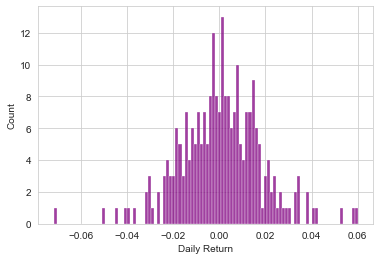

In [18]:
sns.histplot(x=RIL['Daily Return'].dropna(),bins=100,color='purple')

In [19]:
returns_df.head()


Symbols,RELIANCE.NS,HDFCBANK.NS,TCS.NS,INFY.NS,HINDUNILVR.NS
Date,,,,,
2021-07-19,-0.006367,-0.033731,-0.003193,-0.008840,-0.003620
2021-07-20,-0.002454,-0.018933,0.006657,0.005416,0.010898
2021-07-22,0.012847,0.003846,0.003291,0.025902,-0.023307
2021-07-23,-0.007073,-0.004107,-0.001088,0.000157,-0.008431
2021-07-26,-0.013701,-0.005684,-0.004762,0.008457,-0.003986


Aggregating all data into a single dataframe


In [21]:
top_stocks = pd.concat([RIL, HDFCBANK, TCS, INFY, HINDUNILVR],axis=1,keys=pd_list)

In [22]:
top_stocks.columns.names = ['Name','Stock Info']
top_stocks.head()

Name                RIL                                                  \
Stock Info         High          Low         Open        Close   Volume   
Date                                                                      
2021-07-16  2114.750000  2087.600098  2087.750000  2112.399902  4074206   
2021-07-19  2124.000000  2092.250000  2100.000000  2098.949951  3855577   
2021-07-20  2108.000000  2084.000000  2099.500000  2093.800049  3111185   
2021-07-22  2123.899902  2098.149902  2119.000000  2120.699951  3679260   
2021-07-23  2134.449951  2102.050049  2134.449951  2105.699951  4585938   

Name                                                                  \
Stock Info    Adj Close MA for 10 days MA for 20 days MA for 50 days   
Date                                                                   
2021-07-16  2112.399902            NaN            NaN            NaN   
2021-07-19  2098.949951            NaN            NaN            NaN   
2021-07-20  2093.800049            NaN            NaN            NaN   
2021-07-22  2120.699951            NaN            NaN            NaN   
2021-07-23  2105.699951            NaN            NaN            NaN   

Name                     ...         INFY                          \
Stock Info Daily Return  ...         Open        Close     Volume   
Date                     ...                                        
2021-07-16          NaN  ...  1573.750000  1555.449951  6265593.0   
2021-07-19    -0.006367  ...  1544.699951  1541.699951  5669162.0   
2021-07-20    -0.002454  ...  1538.300049  1550.050049  5069939.0   
2021-07-22     0.012847  ...  1561.400024  1590.199951  7854575.0   
2021-07-23    -0.007073  ...  1588.550049  1590.449951  4179719.0   

Name                    HINDUNILVR                                         \
Stock Info    Adj Close       High          Low         Open        Close   
Date                                                                        
2021-07-16  1525.628906    2430.00  2406.000000  2420.000000  2417.399902   
2021-07-19  1512.142578    2417.00  2398.500000  2400.050049  2408.649902   
2021-07-20  1520.332642    2460.00  2403.000000  2403.000000  2434.899902   
2021-07-22  1559.712769    2508.00  2375.500000  2450.000000  2378.149902   
2021-07-23  1559.958008    2391.75  2354.699951  2382.000000  2358.100098   

Name                                
Stock Info     Volume    Adj Close  
Date                                
2021-07-16   545405.0  2360.526855  
2021-07-19   463873.0  2351.982666  
2021-07-20  1061476.0  2377.615234  
2021-07-22  3546044.0  2322.200439  
2021-07-23  1517589.0  2302.622314  

[5 rows x 34 columns]

Single view plot of all stocks

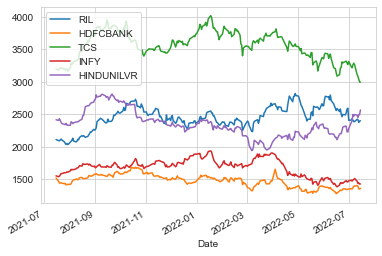

In [23]:
for i in pd_list:
    top_stocks[i]['Close'].plot(label=i)
plt.legend()


Here we are finding correlation between the top 5 stocks, which will determine when the price of a specific stocks goes up/down, how it will effect the price of the other stock

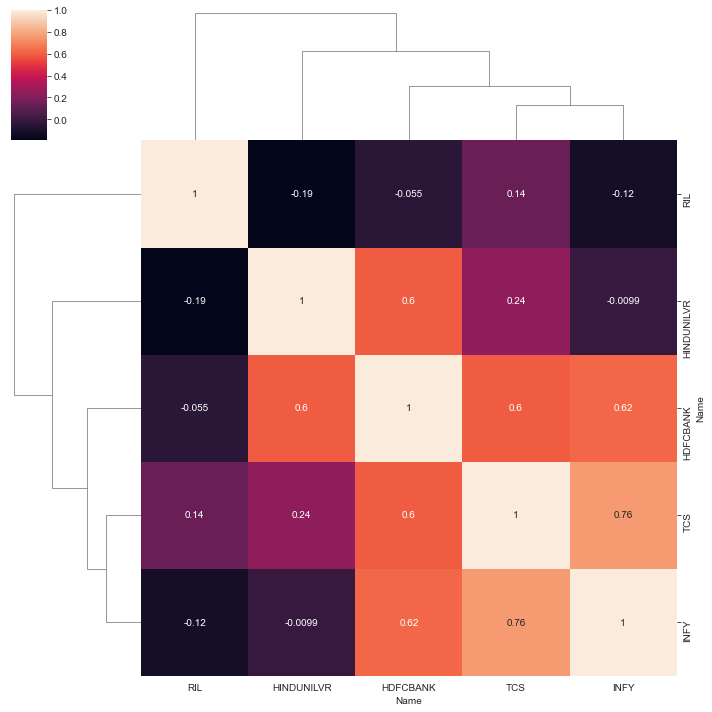

In [24]:
sns.clustermap(top_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)